# Lesson 9 Practice: Supervised Machine Learning
Use this notebook to follow along with the lesson in the corresponding lesson notebook: [L09-Supervised_Machine_Learning-Lesson.ipynb](./L09-Supervised_Machine_Learning-Lesson.ipynb).  
 

## Instructions
Follow along with the teaching material in the lesson. Throughout the tutorial sections labeled as "Tasks" are interspersed and indicated with the icon: ![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/16/Apps-gnome-info-icon.png). You should follow the instructions provided in these sections by performing them in the practice notebook.  When the tutorial is completed you can turn in the final practice notebook. For each task, use the cell below it to write and test your code.  You may add additional cells for any task as needed or desired.  

## Task 1a: Setup

Import the following package sets:
+ packages for data management
+ pacakges for visualization
+ packages for machine learning

Remember to activate the `%matplotlib inline` magic.

In [1]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Task 2a: Data Exploration

After reviewing the data in sections 2.1, 2.2, 2.3 and 2.4 do you see any problems with this iris dataset? If so, please describe them in the practice notebook.  If not, simply indicate that there are no issues.

## Task 2b:  Make Assumptions

After reviewing the data in sections 2.1, 2.2, 2.3 and 2.4 are there any columns that would make poor predictors of species? 

**Hint**: columns that are poor predictors are:
+ those with too many missing values
+ those with no difference in variation when grouped by the outcome class
+ variables with high levels of collinearity

## Task 3a: Practice with the random forest classifier

Now that you have learned how to perform supervised machine learning using a variety of algorithms, lets practice using a new algorithm we haven't looked at yet: the Random Forest Classifier.  The random forest classifier builds multiple decision trees and merges them together.  Review the sklearn [online documentation for the RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).  For this task:

1. Perform a 10-fold cross-validation strategy to see how well the random forest classifier performs with the iris data
2. Use a boxplot to show the distribution of accuracy
3. Use the `fit` and `predict` functions to see how well it performs with the testing data.
4. Plot the confusion matrix
5. Print the classification report.


In [2]:
iris = sns.load_dataset('iris')

predictors = iris.loc[:,'sepal_length':'petal_width'].values

# Show the contents of X by displaying the first 10 rows.
predictors[0:10]

predictors = preprocessing.robust_scale(predictors)

response = iris['species'].values

# Show the contents of X by displaying the first 10 elements.
response[0:10]

# Split-out validation dataset
pred_test, pred_val, resp_test, resp_val = model_selection.train_test_split(predictors, response, test_size=0.2, random_state=10)

# Prep k-fold strat
kfold = model_selection.KFold(n_splits=10, random_state=10)

In [3]:
# Create the RandomForestClassifier object with defaults.
rand_forest = RandomForestClassifier()

In [4]:
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10),
    'RandomForestClassifier' : np.zeros(10)
}
results

{'LogisticRegression': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'LinearDiscriminantAnalysis': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'KNeighborsClassifier': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'DecisionTreeClassifier': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'GaussianNB': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'SVC': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'RandomForestClassifier': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [11]:
# Execute the cross-validation strategies
log_reg = LogisticRegression(solver='lbfgs', multi_class="auto")
lda = LinearDiscriminantAnalysis()
kn = KNeighborsClassifier()
cart = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC(gamma='auto')

results['SVC'] = model_selection.cross_val_score(svc, pred_test, resp_test, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)

results['GaussianNB'] = model_selection.cross_val_score(gnb, pred_test, resp_test, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)

results['DecisionTreeClassifier'] = model_selection.cross_val_score(cart, pred_test, resp_test, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)

results['KNeighborsClassifier'] = model_selection.cross_val_score(kn, pred_test, resp_test, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)

results['LinearDiscriminantAnalysis'] = model_selection.cross_val_score(lda, pred_test, resp_test, cv=kfold, 
                                                                        scoring="accuracy", error_score=np.nan)

results['LogisticRegression'] = model_selection.cross_val_score(log_reg, pred_test, resp_test, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)
                                                                        
results['RandomForestClassifier'] = model_selection.cross_val_score(rand_forest, pred_test, resp_test, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)

C:\Users\matthew.brousil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\matthew.brousil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\matthew.brousil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\matthew.brousil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

In [12]:
results["RandomForestClassifier"]

array([1.        , 0.83333333, 0.91666667, 0.91666667, 1.        ,
       1.        , 1.        , 0.83333333, 0.91666667, 1.        ])

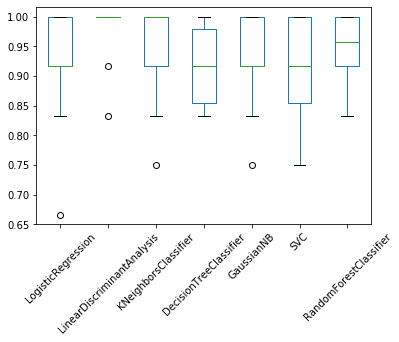

In [13]:
# Plot the outputs
pd.DataFrame(results).plot(kind = "box", rot = 45)

In [16]:
# Create a new model using all of the training data.
rand_forest.fit(pred_test, resp_test)

# Using the testing data, predict the iris species.
predictions = rand_forest.predict(pred_val)

# Let's see the predictions
predictions

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [17]:
accuracy_score(resp_val, predictions)

0.9666666666666667

In [18]:
labels = ['versicolor', 'virginica', 'setosa']
cm = confusion_matrix(resp_val, predictions, labels = labels)
print(cm)

[[12  1  0]
 [ 0  7  0]
 [ 0  0 10]]


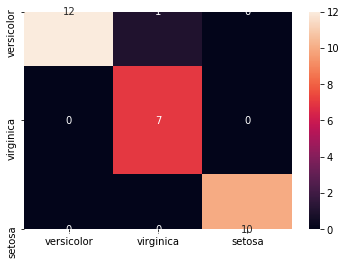

In [19]:
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);

In [20]:
class_rep = classification_report(resp_val, predictions)
print(class_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

